In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from matplotlib.colors import ListedColormap

%store -r merged_df
%store -r monthly_df
#monthly_df.head()
#merged_df.head()
merged_df.state_name.unique()

array(['California', 'Texas', 'New York', 'Colorado', 'Florida'],
      dtype=object)

In [2]:
california_df = merged_df.loc[merged_df.state_name == 'California']
california_df.head()
california_df.columns

Index(['state_code', 'state_name', 'period', 'value', 'Crude Oil Production',
       'Dry Natural Gas Production', 'Coal Production',
       'Total Energy Production (qBtu)', 'Liquid Fuels Consumption',
       'Natural Gas Consumption', 'Coal Consumption',
       'Electricity Consumption', 'Renewables Consumption',
       'Total Energy Consumption (qBtu)', 'Crude Oil ($/barrel)',
       'Natural Gas ($/mBtu) ', 'Coal ($/mBtu)',
       'Real Gross Domestic Product (Trillions)',
       'RGDP Percent change YOY (%)', 'GDP Implicit Price Deflator',
       'GDP IPD Percent change YOY (%)', 'Real Disposable Personal Income',
       'RDPI Percent change YOY (%)', 'Manufacturing Production Index',
       'MPI Percent change YOY (%)'],
      dtype='object')

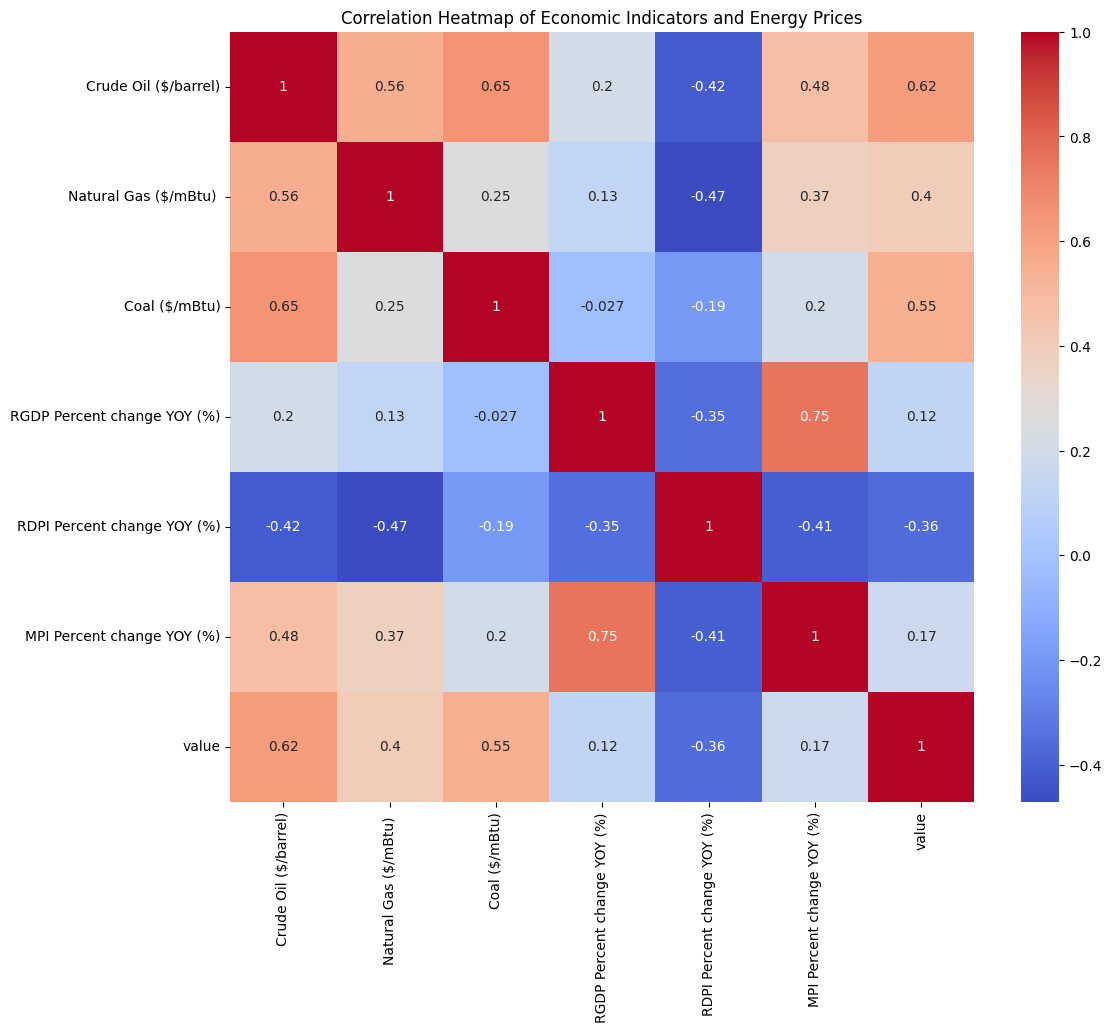

In [3]:
columns = ['Crude Oil ($/barrel)', 'Natural Gas ($/mBtu) ',
           'Coal ($/mBtu)', 'RGDP Percent change YOY (%)',
           'RDPI Percent change YOY (%)',
           'MPI Percent change YOY (%)','value']

#correlation matrix
corr = california_df[columns].corr()

#heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Economic Indicators and Energy Prices')
plt.show()

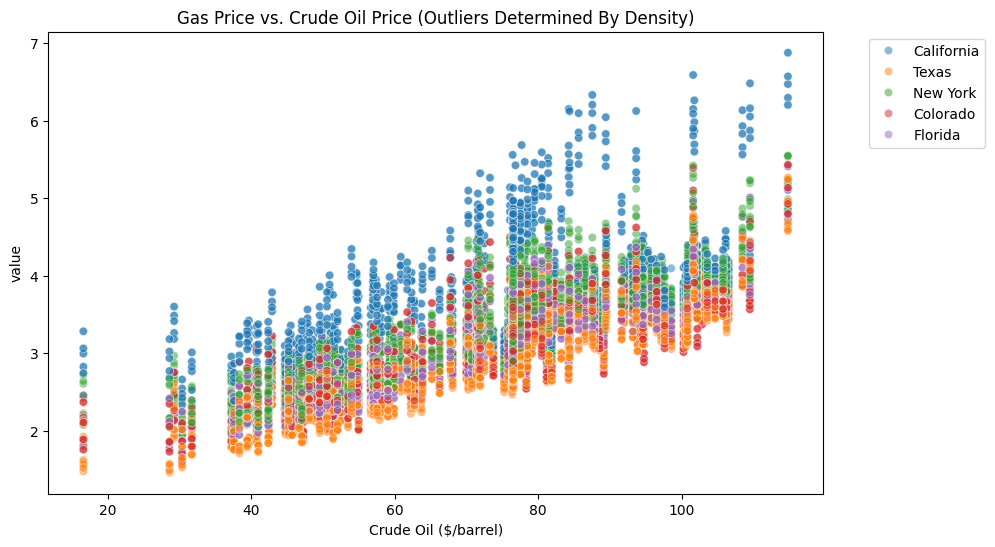

In [4]:
# Scatterplot: Gas Price vs. Crude Oil Price (highlight outliers)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Crude Oil ($/barrel)', y='value', data= merged_df, hue='state_name', alpha=0.5)
plt.title('Gas Price vs. Crude Oil Price (Outliers Determined By Density)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

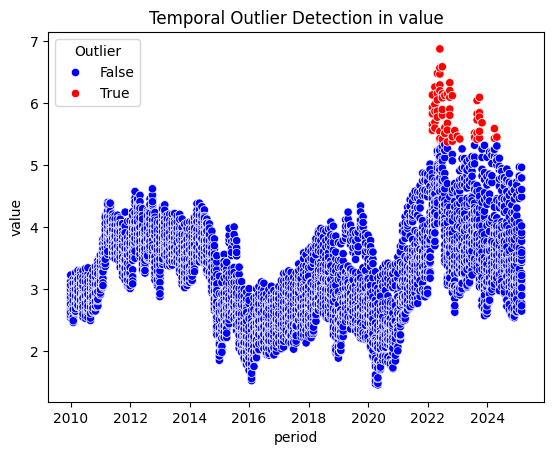

In [5]:
# Calculate IQR for Crude Oil Prices
Q1 = merged_df['value'].quantile(0.25)
Q3 = merged_df['value'].quantile(0.75)
IQR = Q3 - Q1

# Flag outliers
merged_df['Outlier'] = (merged_df['value'] < (Q1 - 1.5 * IQR)) | (merged_df['value'] > (Q3 + 1.5 * IQR))

# Plot outliers
sns.scatterplot(x='period', y='value', data=merged_df, hue='Outlier', palette={True: 'red', False: 'blue'})
plt.title('Temporal Outlier Detection in value')
plt.show()